### Function transformer

##### The Function Transformer in scikit-learn is a transformer class that allows you to apply custom functions to your data within a machine learning pipeline. It enables us to wrap any function you define (or a predefined function) so that it can be used as part of the pipeline, which is helpful when you want to apply transformation to your data that aren't already available through built-in transformers.

In [2]:
import pandas as pd 
import numpy as np 

import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import FunctionTransformer 

#### the prob plot is the probability plotting which is a graphical technique for assessing whether a dataset follows a particular theoretical distribution (such as the normal distribution).

#### dist = distibution to which the data is compared the default is "norm" which stands for "normal distribution". other distribution can also be specified, such as "uniform","expon,etc



In [3]:
df=sns.load_dataset('titanic')
df=df[['age','fare','survived']]
df['age'].fillna(df['age'].mean(),inplace=True)
df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1160\2626044583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


age         0
fare        0
survived    0
dtype: int64

In [4]:
df.sample(5)

,age,fare,survived
607,27.000000,30.5000,1
872,33.000000,5.0000,0
753,23.000000,7.8958,0
707,42.000000,26.2875,1
792,29.699118,69.5500,0


In [5]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1160\589805248.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


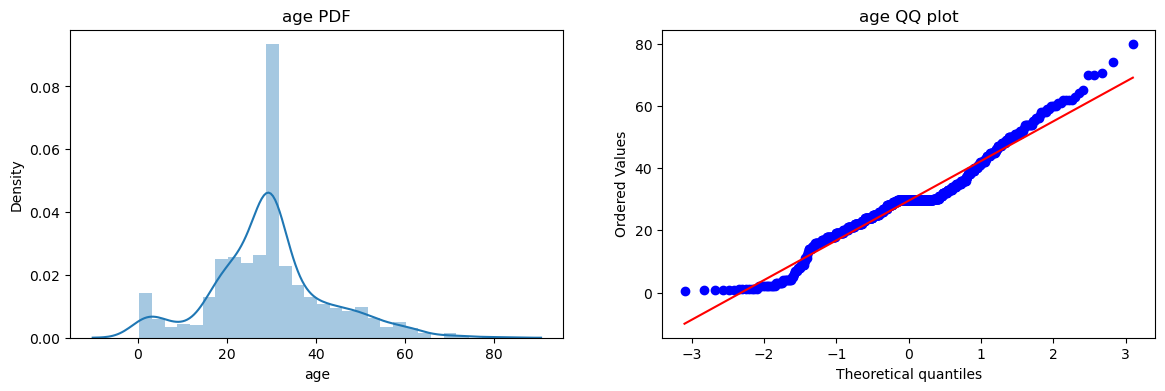

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('age PDF')
plt.subplot(122)
stats.probplot(X_train['age'],dist="norm",plot=plt)
plt.title('age QQ plot')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1160\3307083883.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


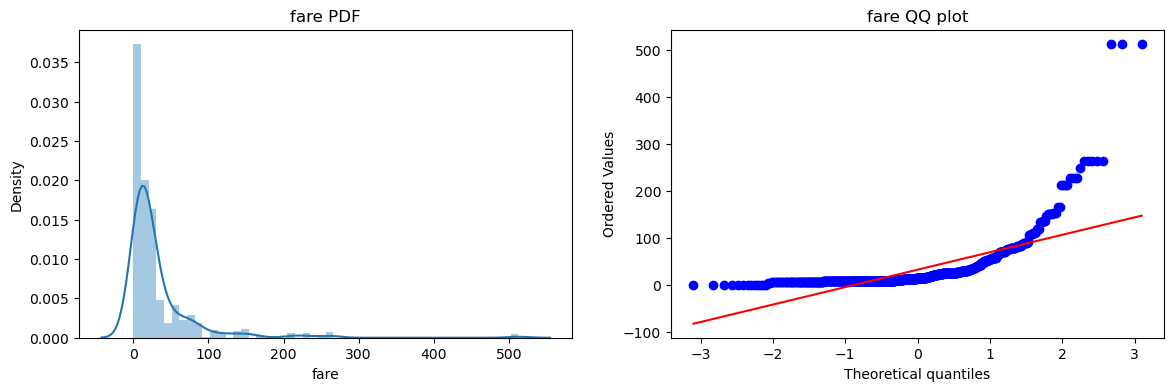

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('fare PDF')
plt.subplot(122)
stats.probplot(X_train['fare'],dist="norm",plot=plt)
plt.title('fare QQ plot')
plt.show()

In [8]:
##  before log transform

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print('accuracy LR', accuracy_score(y_test,y_pred))
print('accuracy DT', accuracy_score(y_test,y_pred1))

accuracy LR 0.6480446927374302
accuracy DT 0.664804469273743


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
trf=FunctionTransformer(func=np.log1p)


In [10]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print('accuracy LR',accuracy_score(y_test,y_pred))
print('accuracy DT',accuracy_score(y_test,y_pred2))

accuracy LR 0.7374301675977654
accuracy DT 0.5921787709497207


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


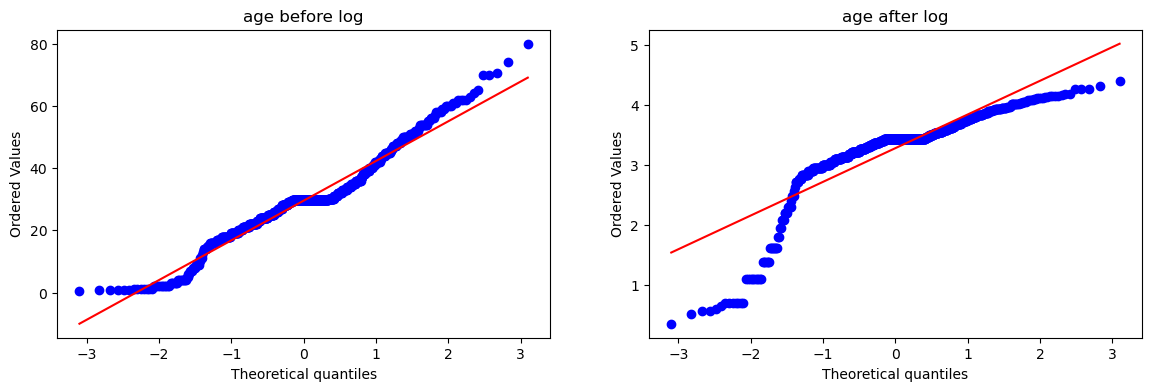

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['age'],dist="norm",plot=plt)
plt.title('age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['age'],dist="norm",plot=plt)
plt.title('age after log')

plt.show()

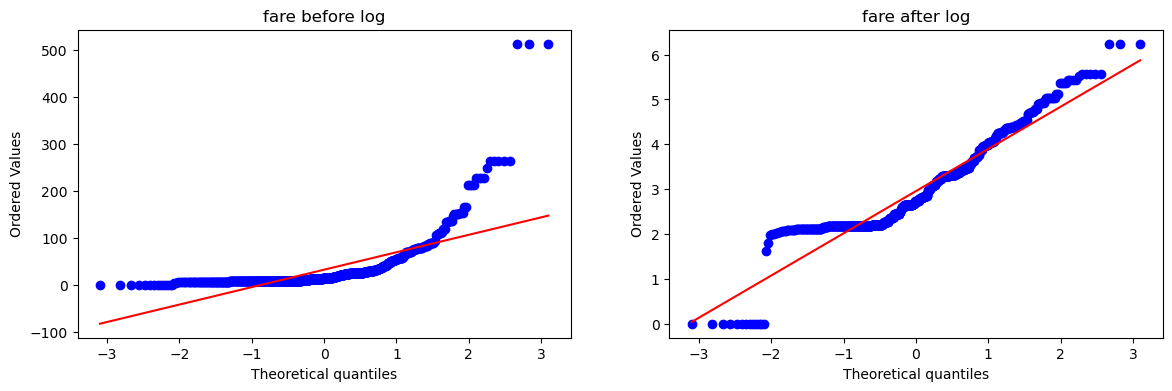

In [12]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['fare'],dist="norm",plot=plt)
plt.title('fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['fare'],dist="norm",plot=plt)
plt.title('fare after log')

plt.show()

In [13]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)


In [14]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print('accuracy LR',accuracy_score(y_test,y_pred))
print('accuracy DT',accuracy_score(y_test,y_pred2))

accuracy LR 0.6703910614525139
accuracy DT 0.6871508379888268


## other transformation 

In [16]:
def transformation(apply):
    
    X = df[['age', 'fare']]  
    y = df['survived']  
    
    
    trf = ColumnTransformer([('log', FunctionTransformer(apply), ['fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)
    
    
    clf = LogisticRegression()

    
    print('accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['fare'], dist="norm", plot=plt) ## 
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

accuracy 0.6712609238451936


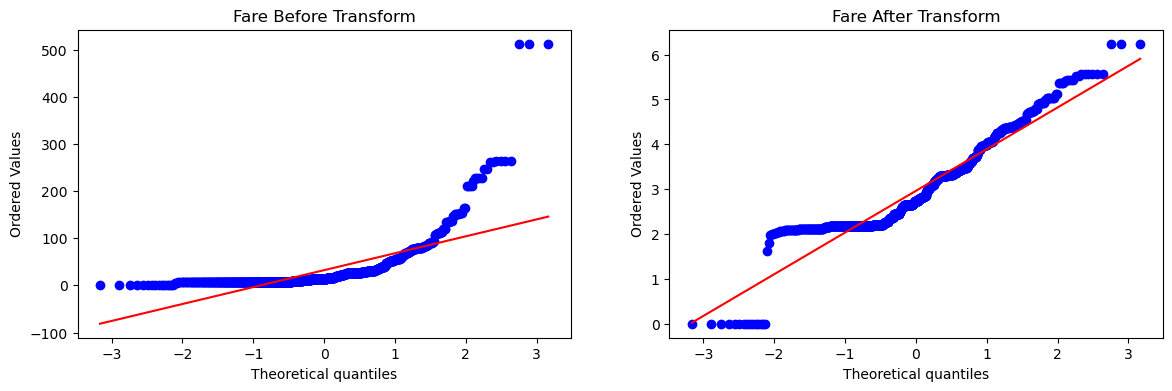

In [17]:
transformation(lambda x:np.log1p(x))